In [1]:
N = 4

In [2]:
from math import ceil,log2
n = ceil(log2(N))

In [3]:
n

2

In [4]:
from random import randint
winner_index = randint(0,N-1)

In [5]:
winner_index

1

In [6]:
winner_state = bin(winner_index)[2:].zfill(n)

In [7]:
winner_state

'01'

In [8]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(n,n)

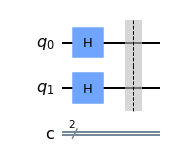

In [9]:
for i in range(n):
    qc.h(i)
qc.barrier()
qc.draw('mpl')

In [10]:
def Householder():
    import numpy as np
    Refl = np.identity(N)
    Refl[winner_index,winner_index]=-1
    from qiskit.quantum_info import Operator
    Refl_Op = Operator(Refl)
    n_qubits = []
    for i in range(n):
        n_qubits.append(i)
    qc.unitary(Refl_Op,qubits=n_qubits,label='Uw')
    qc.barrier()  
    return qc

In [11]:
Householder()

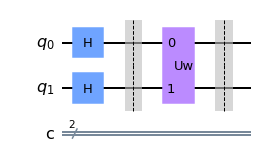

In [12]:
qc.draw('mpl')

In [13]:
def Diffucion():
    for i in range(n):
        qc.x(i)
        qc.h(i)
    qc.barrier()
    qc.h(0)
    controls =[]
    for i in range(1,n):
        controls.append(i)
    qc.mct(controls,0)
    qc.h(0)
    qc.barrier()
    for i in range(n):
        qc.x(i)
        qc.h(i)
    return qc

In [14]:
Diffucion()

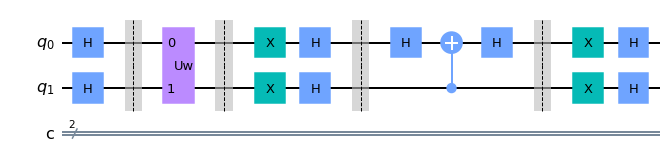

In [15]:
qc.draw('mpl')

In [16]:
from math import sqrt,pi,asin
theta = asin(1/sqrt(N))
t = ceil(pi/(4*theta)-0.5)

In [17]:
t

1

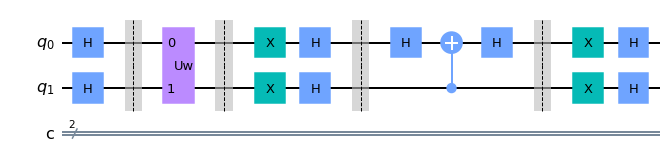

In [18]:
for i in range(t-1):
    Householder()
    Diffucion()
qc.draw('mpl')
    

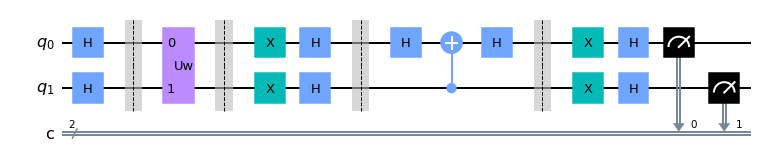

In [19]:
for i in range(n):
    qc.measure(i,i)
qc.draw('mpl')

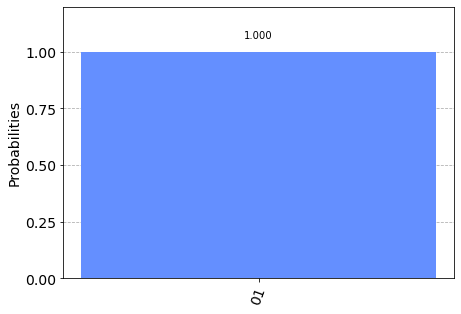

In [20]:
from qiskit.providers.aer import QasmSimulator
from qiskit import transpile
backend = QasmSimulator()
qc_compiled = transpile(qc, backend)
job = backend.run(qc_compiled, shots=1024)
result = job.result()
counts = result.get_counts()
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [21]:
from qiskit.test.mock import FakeMontreal
device_simulator = FakeMontreal()

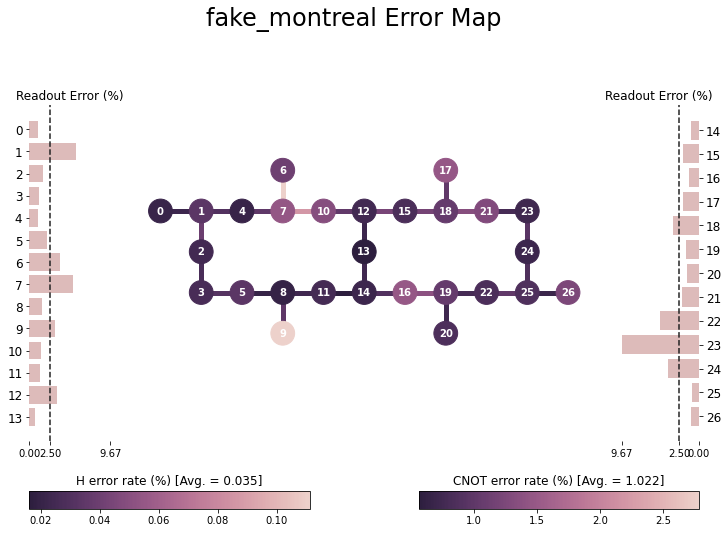

In [22]:
from qiskit.visualization import plot_error_map
plot_error_map(device_simulator)

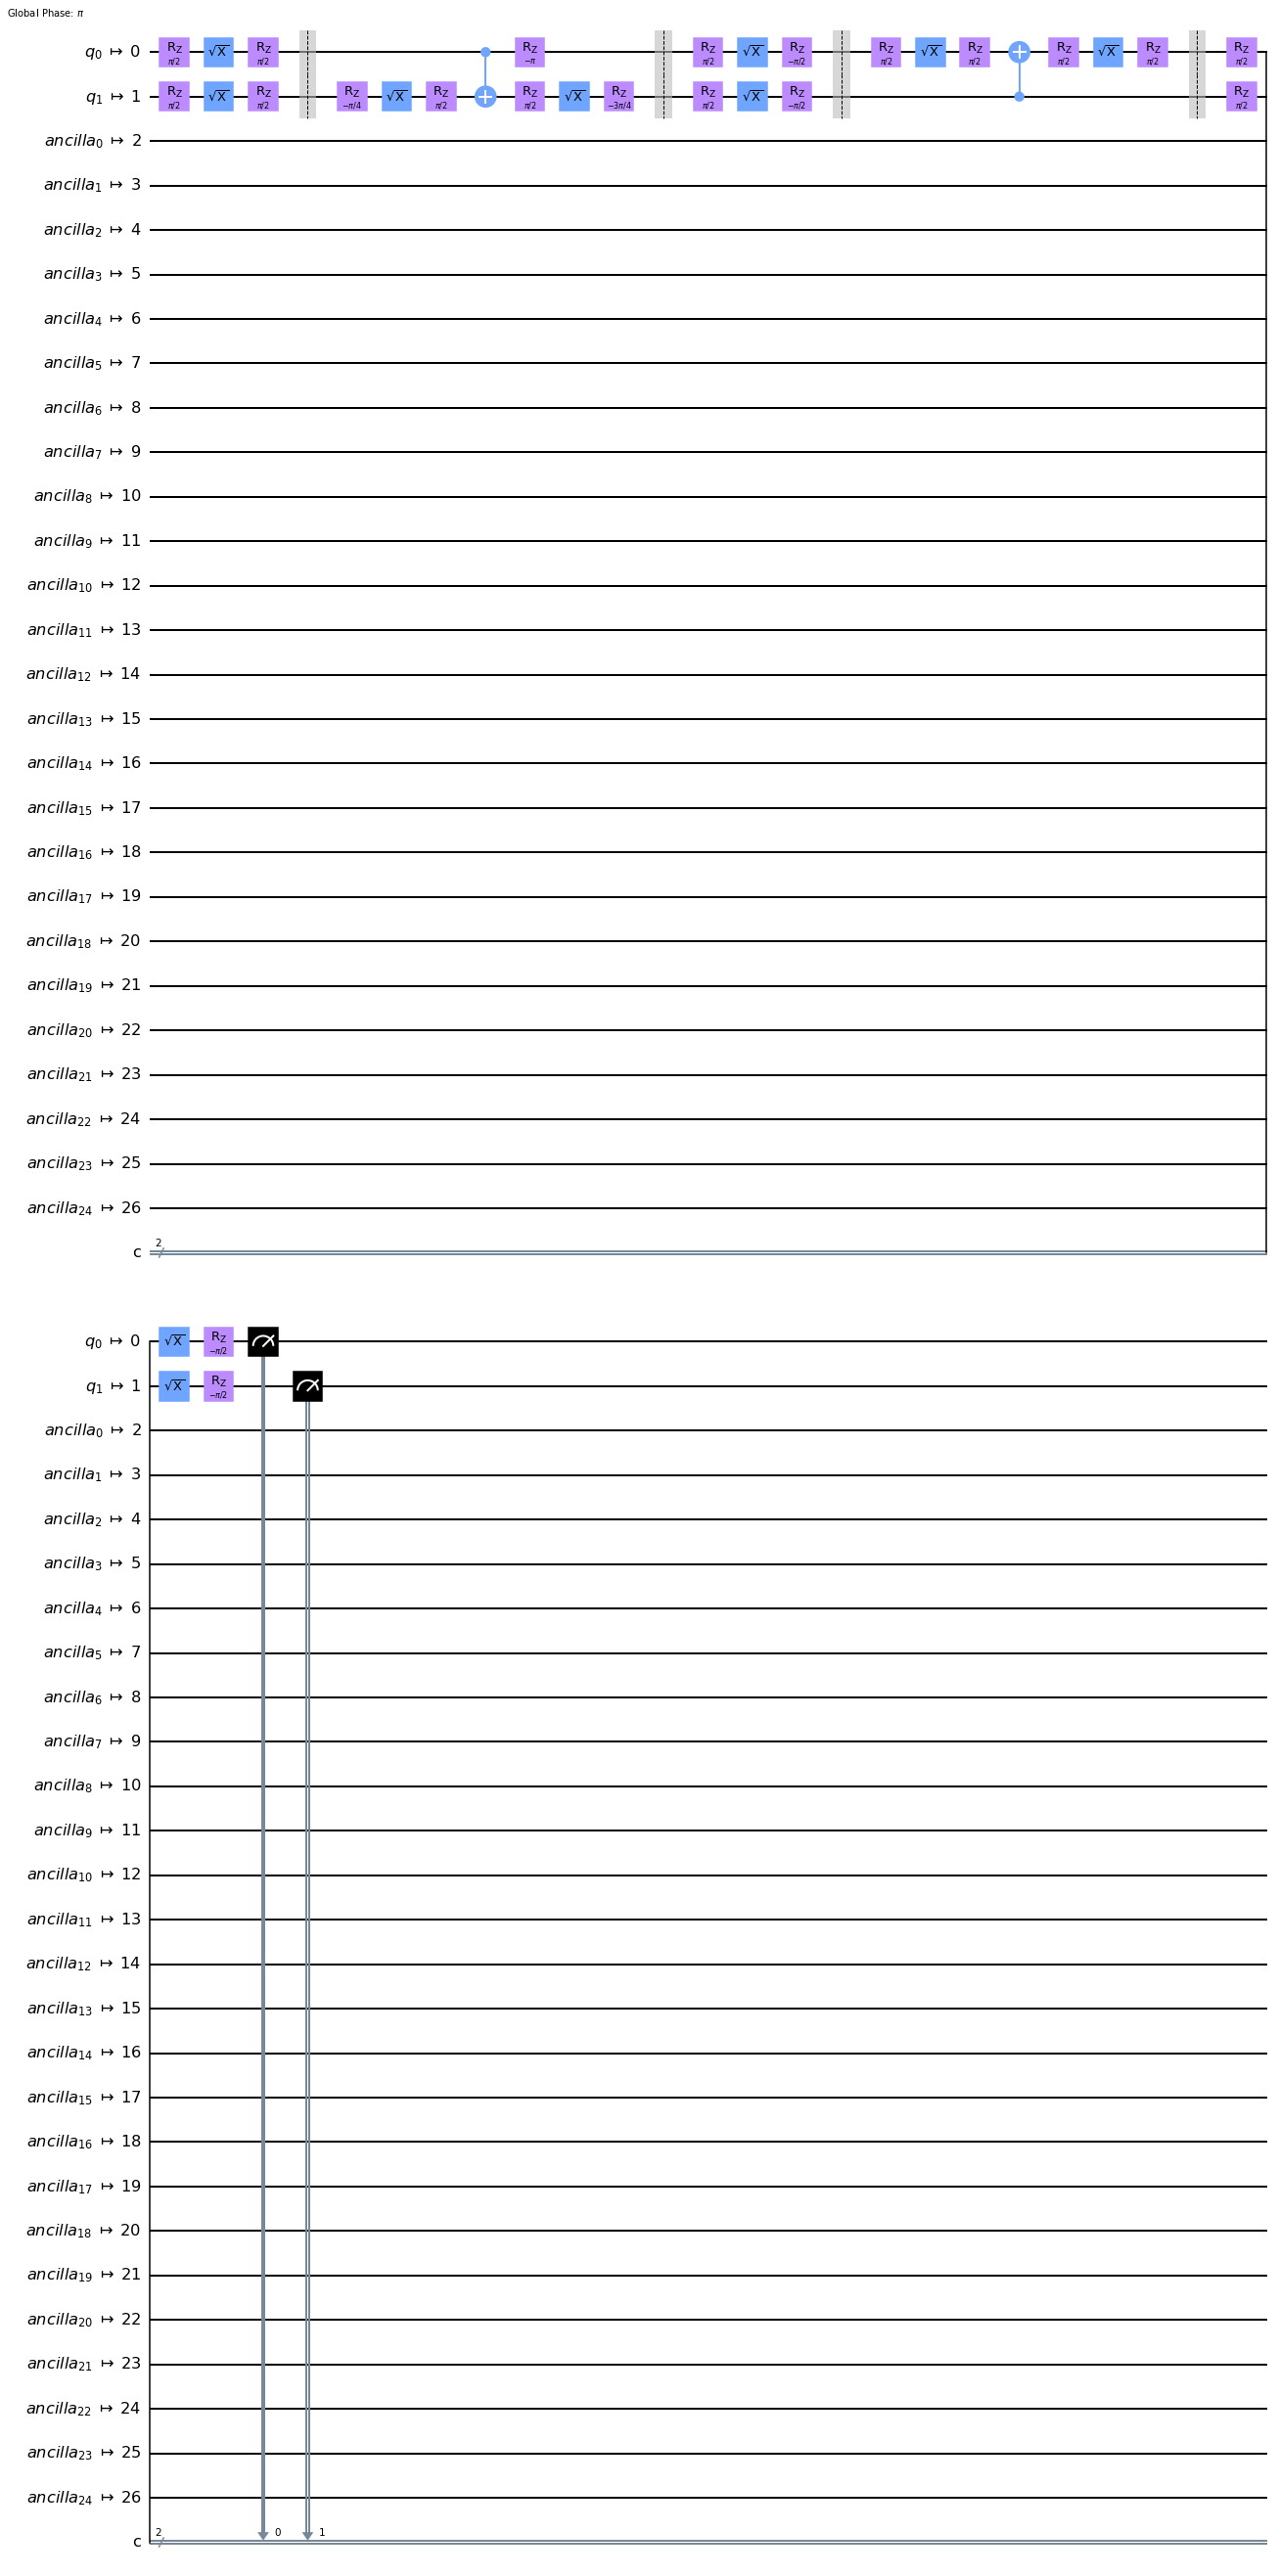

In [23]:
qc2 = transpile(qc,device_simulator)
qc2.draw('mpl')

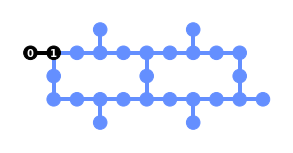

In [26]:
from qiskit.visualization import plot_circuit_layout
plot_circuit_layout(qc2,device_simulator)

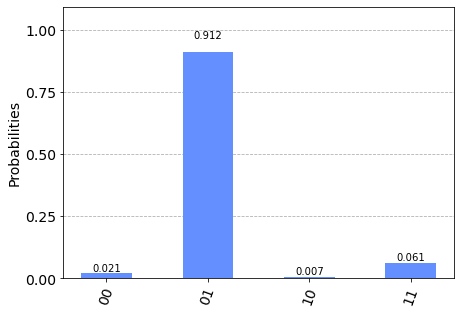

In [24]:
job = device_simulator.run(qc2, shots=1024)
result = job.result()
counts = result.get_counts()
from qiskit.visualization import plot_histogram
plot_histogram(counts)